In [56]:

import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from fredapi import Fred
from dataset import Dataset
import gtab
#sci-kit imports
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.pipeline
from visualizations import Visualizer
np.random.seed(42)

In [57]:
#controling whether tensorflow does recognize my GPU
tf.config.get_visible_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [58]:
data = Dataset.get_btc_data()

In [59]:
data = data.loc["2014-9-17":]

In [60]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,NaN,NaN,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,NaN,NaN,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,NaN,NaN,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,NaN,16919.804688
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16717.173828
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16552.572266
2022-12-29,945186.0,73.206816,53.482266,106.721323,77.966758,2.713737e+08,3.133503e+08,1.263260,0.550805,337268.899500,...,256.320770,264.611725,26.035326,4064.0,21989.981,65799.0,6.516674,21428.3,1.0668,16642.341797


In [61]:
{col: [data[col].isnull().sum(), f'% {np.round(np.mean(data[col].isnull()*100), 3)}'
      ] for col in data.columns if data[col].isnull().any()}

{'BTC / Capitalization, market, estimated supply, USD': [1739, '% 57.45'],
 'Wiki_btc_search': [287, '% 9.481'],
 'Close_^DJI': [939, '% 31.021'],
 'Close_^GSPC': [939, '% 31.021'],
 'Close_GC=F': [942, '% 31.12'],
 'Close_^VIX': [939, '% 31.021'],
 'Close_^IXIC': [939, '% 31.021'],
 'Close_SMH': [939, '% 31.021'],
 'Close_VGT': [939, '% 31.021'],
 'Close_XSD': [939, '% 31.021'],
 'Close_IYW': [939, '% 31.021'],
 'Close_FTEC': [939, '% 31.021'],
 'Close_IGV': [939, '% 31.021'],
 'Close_QQQ': [939, '% 31.021'],
 'Wiki_crypto_search': [287, '% 9.481'],
 'USD_EUR_rate': [122, '% 4.03']}

In [62]:

data['Wiki_crypto_search'] = data['Wiki_crypto_search'].fillna(0)
data['Wiki_btc_search'] = data['Wiki_btc_search'].fillna(0)
#to be changed
data["BTC / Capitalization, market, estimated supply, USD"] = data["BTC / Capitalization, market, estimated supply, USD"].fillna(0)

In [63]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,NaN,NaN,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,NaN,NaN,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,NaN,NaN,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,NaN,16919.804688
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16717.173828
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16552.572266
2022-12-29,945186.0,73.206816,53.482266,106.721323,77.966758,2.713737e+08,3.133503e+08,1.263260,0.550805,337268.899500,...,256.320770,264.611725,26.035326,4064.0,21989.981,65799.0,6.516674,21428.3,1.0668,16642.341797


In [64]:
data[['Close_^DJI','Close_^GSPC','Close_GC=F','Close_^VIX','Close_^IXIC',
    'Close_SMH','Close_VGT','Close_XSD','Close_IYW','Close_FTEC','Close_IGV',
    'Close_QQQ','USD_EUR_rate']] = data[['Close_^DJI','Close_^GSPC','Close_GC=F','Close_^VIX','Close_^IXIC',
    'Close_SMH','Close_VGT','Close_XSD','Close_IYW','Close_FTEC','Close_IGV',
    'Close_QQQ','USD_EUR_rate']].ffill()
data["BTC-USD"] = data["BTC-USD"].shift(-1)
data = data.dropna()

In [65]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,424.440002
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,394.795990
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,402.152008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,228040.789177,...,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621,16919.804688
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621,16717.173828
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16552.572266
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16642.341797


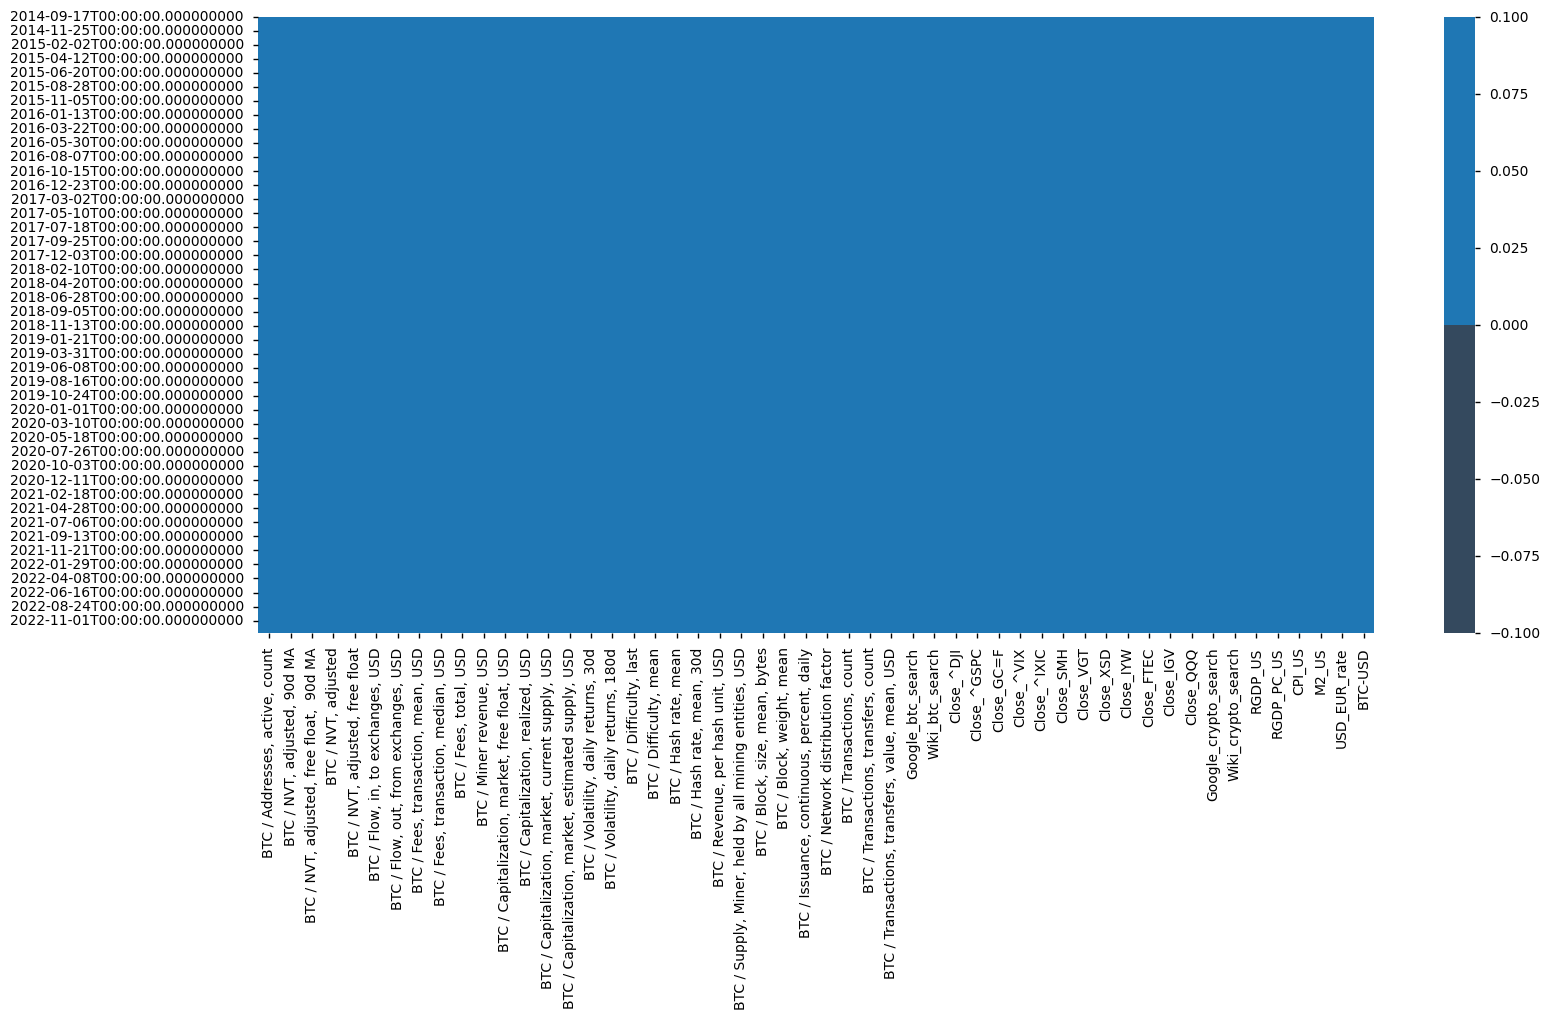

In [66]:
fig = Visualizer.draw_missing_data(data)
fig.show()

In [67]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,424.440002
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,394.795990
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,402.152008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,228040.789177,...,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621,16919.804688
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621,16717.173828
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16552.572266
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16642.341797


In [84]:
train_data, validation_data, train_target, validation_target = sklearn.model_selection.train_test_split(data.iloc[:, :-1], data["BTC-USD"], test_size = 0.1, random_state=42, shuffle=False)
scaler = sklearn.preprocessing.RobustScaler()
pipe = sklearn.pipeline.Pipeline([("scaler",scaler),("estimator",LinearSVR(max_iter = 5000))])
pipe.fit(train_data,train_target)
parameter_grid = {"scaler__unit_variance":[True,False],"estimator__C": [0.2,0.5,0.7,1,3,5,10,20,30]}
split = sklearn.model_selection.TimeSeriesSplit(n_splits=3)
model = sklearn.model_selection.GridSearchCV(pipe, parameter_grid,cv=split, scoring = 'neg_root_mean_squared_error', verbose = 4, n_jobs=-1).fit(train_data,train_target)
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END estimator__C=0.2, scaler__unit_variance=True;, score=-9926.089 total time=   0.0s
[CV 2/3] END estimator__C=0.2, scaler__unit_variance=True;, score=-4574.304 total time=   0.0s
[CV 1/3] END estimator__C=0.2, scaler__unit_variance=False;, score=-10009.552 total time=   0.0s
[CV 2/3] END estimator__C=0.2, scaler__unit_variance=False;, score=-4331.006 total time=   0.0s
[CV 2/3] END estimator__C=0.5, scaler__unit_variance=True;, score=-4276.596 total time=   0.0s
[CV 1/3] END estimator__C=0.5, scaler__unit_variance=True;, score=-9099.905 total time=   0.0s
[CV 2/3] END estimator__C=0.5, scaler__unit_variance=False;, score=-4460.936 total time=   0.0s
[CV 1/3] END estimator__C=0.5, scaler__unit_variance=False;, score=-8772.965 total time=   0.0s
[CV 2/3] END estimator__C=0.7, scaler__unit_variance=True;, score=-3870.192 total time=   0.0s
[CV 1/3] END estimator__C=0.7, scaler__unit_variance=True;, score=-8018.944 tot

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

[CV 1/3] END estimator__C=5, scaler__unit_variance=True;, score=-2942.890 total time=   0.1s
[CV 1/3] END estimator__C=5, scaler__unit_variance=False;, score=-2873.718 total time=   0.1s
[CV 2/3] END estimator__C=5, scaler__unit_variance=True;, score=-533.834 total time=   0.1s
[CV 2/3] END estimator__C=5, scaler__unit_variance=False;, score=-834.211 total time=   0.1s
[CV 1/3] END estimator__C=10, scaler__unit_variance=True;, score=-1897.457 total time=   0.1s
[CV 2/3] END estimator__C=10, scaler__unit_variance=False;, score=-506.009 total time=   0.1s
[CV 1/3] END estimator__C=10, scaler__unit_variance=False;, score=-2011.038 total time=   0.1s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

[CV 1/3] END estimator__C=20, scaler__unit_variance=True;, score=-1534.735 total time=   0.2s
[CV 1/3] END estimator__C=20, scaler__unit_variance=False;, score=-1687.203 total time=   0.1s
[CV 2/3] END estimator__C=10, scaler__unit_variance=True;, score=-569.121 total time=   0.2s
[CV 2/3] END estimator__C=20, scaler__unit_variance=False;, score=-471.024 total time=   0.2s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

[CV 2/3] END estimator__C=20, scaler__unit_variance=True;, score=-493.389 total time=   0.4s
[CV 1/3] END estimator__C=30, scaler__unit_variance=True;, score=-1411.491 total time=   0.2s
[CV 1/3] END estimator__C=30, scaler__unit_variance=False;, score=-1531.728 total time=   0.2s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicit

[CV 2/3] END estimator__C=30, scaler__unit_variance=False;, score=-434.529 total time=   0.4s
[CV 2/3] END estimator__C=30, scaler__unit_variance=True;, score=-470.527 total time=   0.7s
[CV 3/3] END estimator__C=0.2, scaler__unit_variance=True;, score=-32102.059 total time=   1.1s
[CV 3/3] END estimator__C=0.5, scaler__unit_variance=True;, score=-26054.828 total time=   1.1s
[CV 3/3] END estimator__C=0.2, scaler__unit_variance=False;, score=-33534.562 total time=   1.2s
[CV 3/3] END estimator__C=0.7, scaler__unit_variance=True;, score=-22635.675 total time=   1.2s
[CV 3/3] END estimator__C=1, scaler__unit_variance=True;, score=-20586.213 total time=   1.2s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear fa

[CV 3/3] END estimator__C=1, scaler__unit_variance=False;, score=-23389.129 total time=   1.2s
[CV 3/3] END estimator__C=3, scaler__unit_variance=False;, score=-17024.397 total time=   1.2s
[CV 3/3] END estimator__C=5, scaler__unit_variance=True;, score=-11689.490 total time=   1.2s
[CV 3/3] END estimator__C=5, scaler__unit_variance=False;, score=-14017.498 total time=   1.2s
[CV 3/3] END estimator__C=3, scaler__unit_variance=True;, score=-14308.403 total time=   1.2s
[CV 3/3] END estimator__C=0.5, scaler__unit_variance=False;, score=-29602.623 total time=   1.4s
[CV 3/3] END estimator__C=10, scaler__unit_variance=False;, score=-10229.821 total time=   1.2s
[CV 3/3] END estimator__C=0.7, scaler__unit_variance=False;, score=-27026.674 total time=   1.4s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear fa

[CV 3/3] END estimator__C=20, scaler__unit_variance=False;, score=-6948.678 total time=   1.1s
[CV 3/3] END estimator__C=30, scaler__unit_variance=True;, score=-4342.366 total time=   1.0s
[CV 3/3] END estimator__C=10, scaler__unit_variance=True;, score=-7919.107 total time=   1.3s
[CV 3/3] END estimator__C=20, scaler__unit_variance=True;, score=-5507.075 total time=   1.3s
[CV 3/3] END estimator__C=30, scaler__unit_variance=False;, score=-5784.170 total time=   0.9s
{'estimator__C': 30, 'scaler__unit_variance': True}
Pipeline(steps=[('scaler', RobustScaler(unit_variance=True)),
                ('estimator', LinearSVR(C=30, max_iter=5000))])
-2074.7946892682503


In [85]:
model = pipe.fit(train_data,train_target)

In [86]:
[(el[0].shape, el[1].shape) for el in split.split(train_data)]

[((683,), (680,)), ((1363,), (680,)), ((2043,), (680,))]

In [87]:
validation_data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_FTEC,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate
2022-03-02,1091796.0,57.625960,44.467309,60.352625,46.571352,9.126885e+08,9.787781e+08,4.309170,1.742669,1.249452e+06,...,117.522324,344.197449,342.314697,61.776757,7462.0,21738.871,65284.0,8.459524,21651.9,1.1102
2022-03-03,1011448.0,56.048539,43.249383,49.680370,38.335438,8.588087e+08,8.302779e+08,3.177610,1.125209,8.605139e+05,...,115.664688,335.488800,337.424774,61.776757,7396.0,21738.871,65284.0,8.459524,21651.9,1.1053
2022-03-04,949176.0,52.231733,40.304063,51.327825,39.606572,7.137221e+08,8.412254e+08,2.300239,0.782128,5.934416e+05,...,113.433556,328.289917,332.534821,61.776757,6632.0,21738.871,65284.0,8.459524,21651.9,1.0912
2022-03-05,801293.0,52.845158,40.777436,70.432732,54.348712,3.359080e+08,3.351282e+08,1.951078,0.685280,4.412282e+05,...,113.433556,328.289917,332.534821,61.776757,5922.0,21738.871,65284.0,8.459524,21651.9,1.0912
2022-03-06,771254.0,52.493886,40.506206,158.158534,122.040920,3.036040e+08,3.204319e+08,1.746402,0.591350,3.589892e+05,...,113.433556,328.289917,332.534821,61.776757,6112.0,21738.871,65284.0,8.459524,21651.9,1.0912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,2.280408e+05,...,93.671127,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,3.063498e+05,...,93.671127,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,3.938003e+05,...,92.739174,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,3.404568e+05,...,91.212357,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622


In [88]:
predictions = model.predict(validation_data)

In [89]:
y_pred = pd.Series(predictions, index=validation_data.index)
train_pred = pd.Series(model.predict(train_data), index = train_data.index)

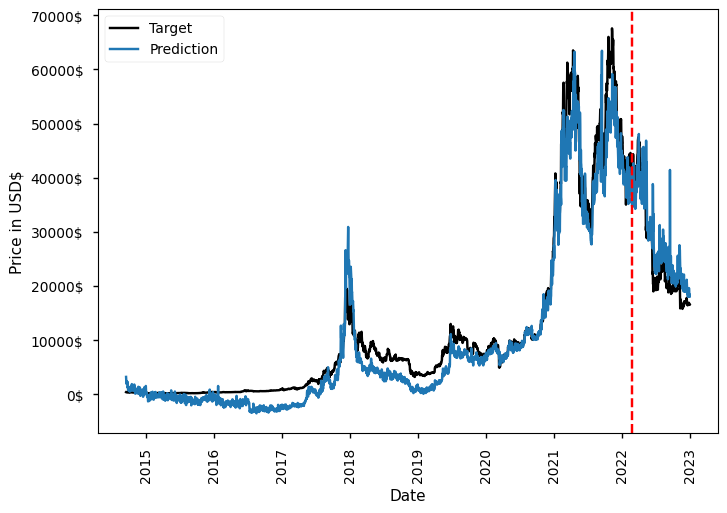

In [90]:
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target, train_pred, validation_target, y_pred)
fig.show()

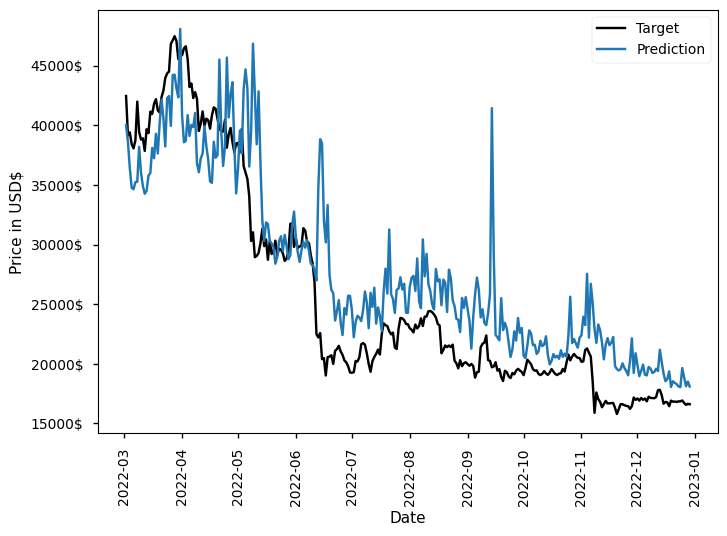

In [91]:
fig = visualizer.draw_prediction_test(validation_target, y_pred)
fig.show()